In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
data = pd.read_csv("C:\\Users\\PUNEET SINGH\\Salaries.csv")
data.shape

(30, 2)

In [3]:
data.head()

,Years of Experience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
# summary of the data
data.describe()

,Years of Experience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
# checking for null values in the data through heatmap
data.isnull().sum()

Years of Experience    0
Salary                 0
dtype: int64

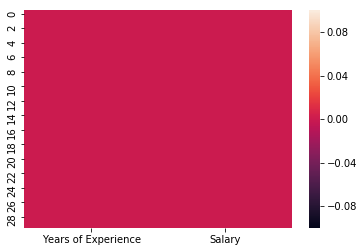

In [6]:
sns.heatmap(data.isnull())
plt.show()

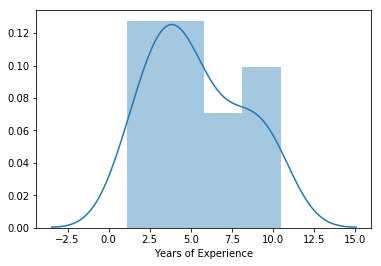

In [7]:
######### univariate analysis
sns.distplot(data['Years of Experience'])
plt.show()
# checking whether the feature varibale is normal or not


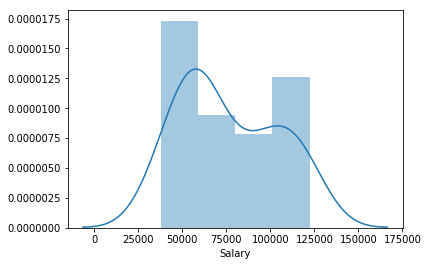

In [8]:
sns.distplot(data['Salary'])
plt.show()
# checking whether the target varibale is normal or not

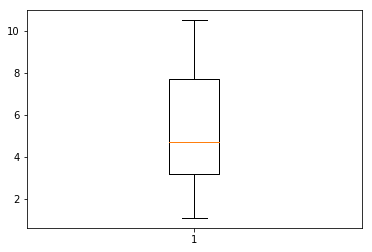

In [9]:
# checking for outliers 
plt.boxplot(data['Years of Experience'])
plt.show()

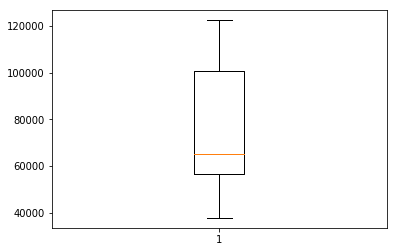

In [10]:
plt.boxplot(data['Salary'])
plt.show()

In [11]:
# feature scaling
# importing the library
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

In [12]:
data = sc_x.fit_transform(data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
data = pd.DataFrame(data)
data.head()

,0,1
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781


In [14]:
# dividing the data into x and y
x = data.values[:,0]
y = data.values[:,1]

In [15]:
# splitting the dataset
# importing the library
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10)


In [17]:
x_train.shape

(27,)

In [18]:
x_train = x_train.reshape(-1,1)
x_train.shape

(27, 1)

In [19]:
x_test = x_test.reshape(-1,1)
x_test.shape

(3, 1)

In [20]:
y_train.shape

(27,)

In [21]:
y_train = y_train.reshape(-1,1)
y_train.shape

(27, 1)

In [22]:
y_test = y_test.reshape(-1,1)
y_test.shape

(3, 1)

In [23]:
# linear regresssion 
# Importing the library
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [24]:
regression.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
pred = regression.predict(x_test)
pred

array([[1.6778988 ],
       [0.9579667 ],
       [0.20375211]])

In [26]:
regression.score(x_test,y_test)*100

29.586207281003418

In [27]:
regression.intercept_

array([-0.03165427])

In [28]:
regression.coef_

array([[0.95654608]])

In [29]:
# checking the score of the pred
# Importing the libraries
from sklearn.metrics import mean_squared_error,mean_absolute_error,roc_curve,roc_auc_score,r2_score

In [30]:
error = mean_absolute_error(y_test,pred)*100
error

31.654265692375745

In [31]:
def MAPE(y_true,y_pred):
    mape = np.mean(np.abs(y_true-y_pred/y_pred))
    return mape

In [32]:
MAPE(y_test,pred)

0.4860980410004563

In [33]:
err = mean_squared_error(y_test,pred)
err

0.13762445782390254

In [34]:
score = r2_score(y_test,pred)
score

0.2958620728100342

In [35]:
# decision tree regression
# Importing the library
from sklearn.tree import DecisionTreeRegressor


In [36]:
reg = DecisionTreeRegressor(max_depth=2)

In [37]:
reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [38]:
y_pred = reg.predict(x_test)
print(y_pred)

[1.30948868 1.30948868 0.46793291]


In [39]:
# checkig the score from this model
error = mean_absolute_error(y_test,y_pred)*100
error

23.41117662515214

In [40]:
reg.score(x_test,y_test)*100


62.977209164323114

In [41]:
err = mean_squared_error(y_test,y_pred)
err

0.07236141271670428

In [42]:
MAPE(y_test,y_pred)

0.4860980410004563

In [43]:
score = r2_score(y_test,y_pred)
score

0.6297720916432311

In [44]:
# depending upon the score and the error values
# linear regression model is predicting better than decision tree